This is a tutorial for basic use of abides_markets simulation.
It uses the simulator directly without the OpenAI Gym interface

In [7]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sys
# sys.path.append('/mnt/ccnas2/bdp/kg1118/projects/jpm/my_abides/')
from abides_core import abides
from abides_core.utils import parse_logs_df, ns_date, str_to_ns, fmt_ts
from abides_markets.orders import Side
from abides_markets.configs.flash_crash import build_config
from abides_markets.configs.agent_params import ExchangeConfig, NoiseAgentConfig, ValueAgentConfig, MarketMakerAgentConfig, MomentumAgentConfig, GBMOracleConfig, InstitutionalTraderAgentConfig
from abides_markets.oracles.mean_reverting_oracle import MeanRevertingOracle
import os
print(os.getcwd())

/vol/bitbucket/ik620/agent_based_learning_for_finance/notebooks


## Build runnable configuration

Here we are generating/building a config from the config file rmsc04. 
The config object is a dictionnary containing key elements like, start time, end time, agents to be used, latency and computation delay models.

In [9]:
oracle_config = GBMOracleConfig(mu=1e-9, sigma=0.0135)
mm_config = MarketMakerAgentConfig(price_skew_param=4, wake_up_freq='1s', subscribe=False, subscribe_freq='1s', subscribe_num_levels=10)
# mm_config = MarketMakerAgentConfig(price_skew_param=4, wake_up_freq=1e9 * (5) , subscribe=False, subscribe_freq='1s', subscribe_num_levels=10)
value_agent_config = ValueAgentConfig(kappa_limit=0.3, kappa_mkt=0.1, mean_wakeup_gap=1e8)
# value_agent_config = ValueAgentConfig(kappa_limit=0.3, kappa_mkt=0.1, mean_wakeup_gap=1e8 * (5))
momentum_agent_config = MomentumAgentConfig(beta_limit=50, beta_mkt=20, wake_up_freq='1s', subscribe=False)
# momentum_agent_config = MomentumAgentConfig(beta_limit=50, beta_mkt=20, wake_up_freq=1e9 * (5), subscribe=False)

exchange_config = ExchangeConfig(log_orders=True)
institutional_config = InstitutionalTraderAgentConfig(inventory=1e13, sell_frequency="00:00:02", sell_volume_factor=1000)

config = build_config(seed=50, end_time="9:40:00", num_noise_agents=15, num_value_agents=10, num_mm_agents=19, num_long_momentum_agents=5, num_short_momentum_agents=5, oracle_params=oracle_config, 
                      mm_agent_params=mm_config, value_agent_params=value_agent_config, momentum_agent_params=momentum_agent_config)
config['stdout_log_level'] = 'INFO'

Noise Agents:  15
<class 'abides_markets.configs.agent_params.ValueAgentConfig'>
100000
Value Agents:  10
Market Maker Agents:  19
Long Momentum Agents:  5
Short Momentum Agents:  5


In [10]:
config.keys(), config['stdout_log_level']

(dict_keys(['seed', 'start_time', 'stop_time', 'agents', 'agent_types', 'agent_latency_model', 'default_computation_delay', 'custom_properties', 'random_state_kernel', 'stdout_log_level', 'log_dir']),
 'INFO')

In [11]:
config['custom_properties']['oracle'].symbols

{'ABM': {'r_bar': 10000,
  'kappa': 1.67e-16,
  'sigma_s': 0,
  'fund_vol': 0.0006,
  'megashock_lambda_a': 2.77778e-18,
  'megashock_mean': 10,
  'megashock_var': 500,
  'random_state': RandomState(MT19937) at 0x7BC0115B6440}}

In [12]:
config['agents'][19].mean_wakeup_gap

100000000.0

## Running simulation

Once the config is ready it can be run using the abides runner function.
It instanciates a simulation kernel, runs the configuration and returns an end_state that mostly contains pointers to the different agent objects.
The agents are in their final state, their internal variables can be accessed to extract informations of interests like logs.

In [13]:
end_state = abides.run(config, log_dir="simulation")

[299056] INFO abides Simulation Start Time: 2024-07-12 17:07:28.300608
[299056] INFO abides_core.kernel --- Simulation time: 2021-02-05 00:00:00, messages processed: 0, wallclock elapsed: 0.00s ---


10000000000000.0
holdings 10000000000000.0
9999999998887.0
holdings 9999999998887.0
9999999996835.0
holdings 9999999996835.0
9999999994100.0
holdings 9999999994100.0
9999999988314.0
holdings 9999999988314.0
9999999983048.0
holdings 9999999983048.0
9999999972109.0
holdings 9999999972109.0
9999999953395.0
holdings 9999999953395.0
9999999929223.0
holdings 9999999929223.0
9999999896881.0
holdings 9999999896881.0
9999999852876.0
holdings 9999999852876.0
9999999818482.0
holdings 9999999818482.0
9999999775737.0
holdings 9999999775737.0


[299056] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:30:28, messages processed: 100,000, wallclock elapsed: 13.90s ---


9999999699043.0
holdings 9999999699043.0
9999999564815.0
holdings 9999999564815.0
9999999385568.0
holdings 9999999385568.0
9999999183953.0
holdings 9999999183953.0
9999998964230.0
holdings 9999998964230.0
9999998650567.0
holdings 9999998650567.0
9999998191138.0
holdings 9999998191138.0
9999997442337.0
holdings 9999997442337.0
9999996194131.0
holdings 9999996194131.0
9999994050470.0
holdings 9999994050470.0
9999990959098.0
holdings 9999990959098.0
9999988199778.0
holdings 9999988199778.0


[299056] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:30:51, messages processed: 200,000, wallclock elapsed: 29.68s ---


9999985578762.0
holdings 9999985578762.0
9999981576151.0
holdings 9999981576151.0
9999977289520.0
holdings 9999977289520.0
9999970211576.0
holdings 9999970211576.0
9999960795635.0
holdings 9999960795635.0
9999952563285.0
holdings 9999952563285.0
9999945111109.0
holdings 9999945111109.0
9999933662881.0
holdings 9999933662881.0
9999915131698.0
holdings 9999915131698.0
9999889206626.0
holdings 9999889206626.0


[299056] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:31:12, messages processed: 300,000, wallclock elapsed: 46.63s ---


9999857107155.0
holdings 9999857107155.0
9999824259214.0
holdings 9999824259214.0
9999794365433.0
holdings 9999794365433.0
9999741079579.0
holdings 9999741079579.0
9999679769011.0
holdings 9999679769011.0
9999608272596.0
holdings 9999608272596.0
9999506948419.0
holdings 9999506948419.0
9999349930968.0
holdings 9999349930968.0
9999002106194.0
holdings 9999002106194.0
9998524001008.0
holdings 9998524001008.0
9997921080530.0
holdings 9997921080530.0


[299056] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:31:34, messages processed: 400,000, wallclock elapsed: 63.48s ---


9997396483306.0
holdings 9997396483306.0
9996609549139.0
holdings 9996609549139.0
9995143154268.0
holdings 9995143154268.0
9993566987894.0
holdings 9993566987894.0
9991394208402.0
holdings 9991394208402.0
9988090203658.0
holdings 9988090203658.0
9982103491069.0
holdings 9982103491069.0
9972965324551.0
holdings 9972965324551.0
9958321121194.0
holdings 9958321121194.0
9940955333972.0
holdings 9940955333972.0
9915565824239.0
holdings 9915565824239.0


[299056] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:31:54, messages processed: 500,000, wallclock elapsed: 80.42s ---


9891982363118.0
holdings 9891982363118.0
9838707707532.0
holdings 9838707707532.0
9758289583134.0
holdings 9758289583134.0
9632238778193.0
holdings 9632238778193.0
9469282379107.0
holdings 9469282379107.0
9231553946647.0
holdings 9231553946647.0
8999666125024.0
holdings 8999666125024.0
8641222308290.0
holdings 8641222308290.0
8244714076070.0
holdings 8244714076070.0
7916354864409.0
holdings 7916354864409.0


[299056] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:32:16, messages processed: 600,000, wallclock elapsed: 97.31s ---


7483384088616.0
holdings 7483384088616.0
6699009061429.0
holdings 6699009061429.0
5436745672432.0
holdings 5436745672432.0
3039485376239.0
holdings 3039485376239.0
62994853903.0
holdings 62994853903.0


[299056] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:32:52, messages processed: 700,000, wallclock elapsed: 122.23s ---
[299056] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:33:47, messages processed: 800,000, wallclock elapsed: 162.93s ---
[299056] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:34:49, messages processed: 900,000, wallclock elapsed: 187.92s ---
[299056] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:35:53, messages processed: 1,000,000, wallclock elapsed: 211.85s ---
[299056] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:36:55, messages processed: 1,100,000, wallclock elapsed: 236.36s ---
[299056] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:38:00, messages processed: 1,200,000, wallclock elapsed: 257.93s ---
[299056] INFO abides_core.kernel --- Simulation time: 2021-02-05 09:39:06, messages processed: 1,300,000, wallclock elapsed: 279.54s ---
[299056] INFO abides_core.kernel Event Queue el

agent_types:  ['ExchangeAgent', 'InstitutionalTraderAgent', 'NoiseAgent', 'NoiseAgent', 'NoiseAgent', 'NoiseAgent', 'NoiseAgent', 'NoiseAgent', 'NoiseAgent', 'NoiseAgent', 'NoiseAgent', 'NoiseAgent', 'NoiseAgent', 'NoiseAgent', 'NoiseAgent', 'NoiseAgent', 'NoiseAgent', 'ValueAgent', 'ValueAgent', 'ValueAgent', 'ValueAgent', 'ValueAgent', 'ValueAgent', 'ValueAgent', 'ValueAgent', 'ValueAgent', 'ValueAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'POVMarketMakerAgent', 'MomentumAgent', 'MomentumAgent', 'MomentumAgent', 'MomentumAgent', 'MomentumAgent', 'MomentumAgent', 'MomentumAgent', 'MomentumAgent', 'MomentumAgent', 

## Retrieving results from end_state

By convention in abides_markets configuration the first agent is the exchange agent. 
It contains an order_book. By default it logs its history.

In [14]:
order_book = end_state["agents"][0].order_books["ABM"]

In [15]:
ms_list = end_state["agents"][-5].momentum_signal_list

In [16]:
np.tanh(100*np.array(ms_list))

array([-1.73826606e-01, -3.10736246e-02, -5.71569276e-02, -1.26902715e-01,
       -1.69335993e-01, -1.70966315e-02, -1.00962263e-01, -5.53821118e-02,
       -5.54382706e-03, -7.29649178e-02, -3.45135102e-02, -3.97349222e-02,
       -1.48234441e-01, -5.12649889e-02,  3.96448505e-03, -7.67931476e-02,
       -4.40846884e-02, -3.62739639e-02, -2.40554244e-01, -6.10048973e-02,
       -1.42309778e-01, -5.54643254e-02, -3.30126576e-02, -3.30245382e-03,
       -9.48933484e-03, -2.38469518e-02, -2.52880961e-02, -5.74697747e-02,
       -1.78230162e-01, -1.80134700e-02, -2.75189061e-01, -2.05195196e-01,
       -7.60948804e-02, -6.76056825e-02, -2.14756582e-03, -6.48717299e-02,
       -3.42463948e-02, -1.14067071e-01, -6.82290067e-03, -5.31581302e-03,
       -1.38748716e-01, -5.10549789e-02, -1.06898770e-01, -1.07304656e-02,
       -4.75296555e-02, -1.06716563e-01, -2.00217208e-02, -2.00243700e-03,
       -2.81344504e-02, -7.72136487e-02, -1.09902988e-01, -4.83396287e-02,
       -4.68322481e-02, -

In [17]:
for symbol in end_state["agents"][0].oracle.f_log:
    print(symbol)
    dfFund = pd.DataFrame(end_state["agents"][0].oracle.f_log[symbol])

ABM


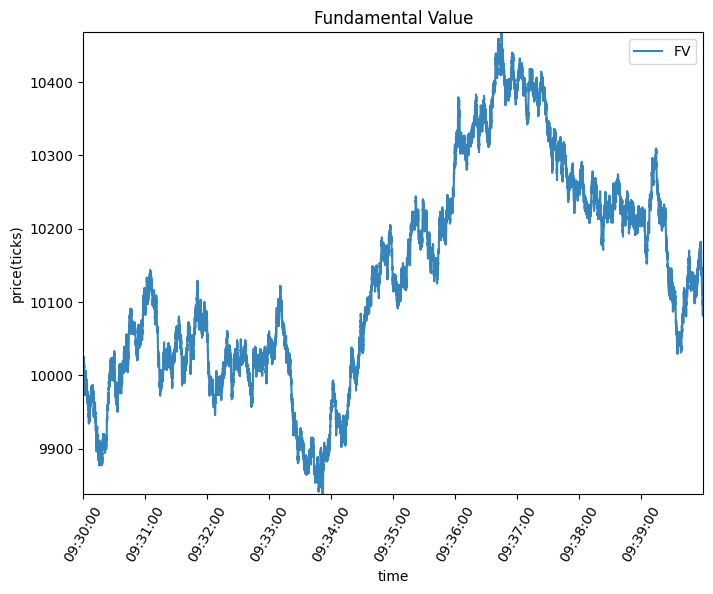

In [18]:
dfFund['time'] = dfFund['FundamentalTime'].apply( lambda x: x - ns_date(x))

start, end = str_to_ns("09:30:00"), str_to_ns("9:40:00")

dfFund = dfFund[(dfFund['time'] > start) & (dfFund['time'] < end)].copy()

y_max, y_min = dfFund.FundamentalValue.max(), dfFund.FundamentalValue.min()

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(dfFund.time, dfFund.FundamentalValue, alpha=0.9, label='FV')
ax.set_ylabel("price(ticks)")
ax.set_xlabel("time")
ax.set_ylim(y_min, y_max)
ax.set_xlim(start, end)
ax.set_title('Fundamental Value')

time_mesh = np.arange(start, end, 1e9*60)
ax.set_xticks(time_mesh, [fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60)
plt.legend(loc='best')
plt.show()

### Order book history L1

L1 data snapshots for every tick can be extracted
( best bid and ask price and quantity )

In [19]:
L1 = order_book.get_L1_snapshots()

Here we plot the time series of the best bid and best ask price thoughout the simulation

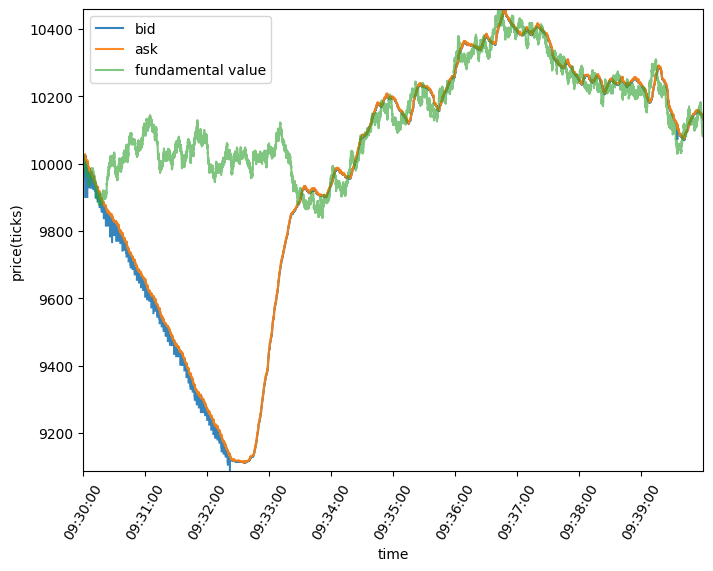

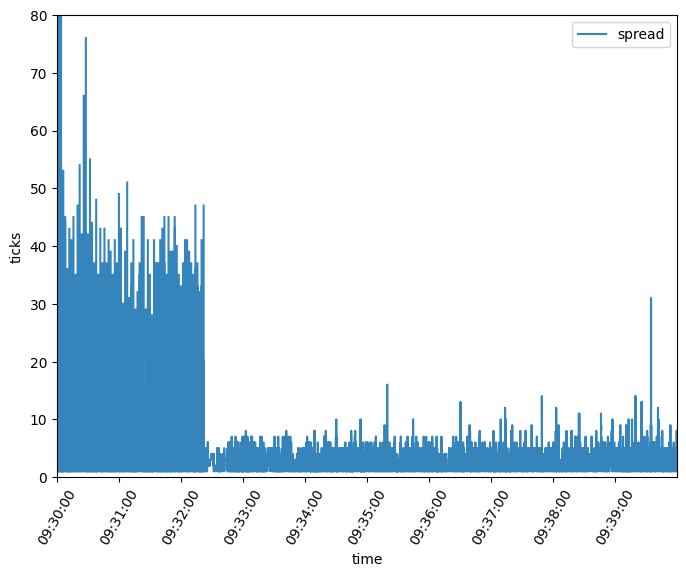

In [20]:
best_bids = pd.DataFrame(L1["best_bids"],columns=["time","price","qty"])
best_asks = pd.DataFrame(L1["best_asks"],columns=["time","price","qty"])

## All times are in ns from 1970, remove the date component to put them in ns from midnight
best_bids["time"] = best_bids["time"].apply( lambda x: x - ns_date(x) )
best_asks["time"] = best_asks["time"].apply( lambda x: x - ns_date(x) )

start, end = str_to_ns("09:30:00"), str_to_ns("09:40:00")

best_bids = best_bids[(best_bids['time'] > start) & (best_bids['time'] < end)]
best_asks = best_asks[(best_asks['time'] > start) & (best_asks['time'] < end)]

y_max, y_min = best_asks.price.max(), best_bids.price.min()

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(best_bids.time,best_bids.price, alpha=0.9, label='bid')
ax.plot(best_asks.time,best_asks.price, alpha=0.9, label='ask')
ax.plot(dfFund.time, dfFund.FundamentalValue, alpha=0.6, label='fundamental value')
ax.set_ylabel("price(ticks)")
ax.set_xlabel("time")
ax.set_ylim(y_min, y_max)
ax.set_xlim(start, end)

time_mesh = np.arange(start, end, 1e9*60)
ax.set_xticks(time_mesh, [fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60)
plt.legend(loc='best')
plt.show()

spread = best_asks.price - best_bids.price

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(best_bids.time, spread, alpha=0.9, label='spread')
ax.set_ylabel("ticks")
ax.set_xlabel("time")
ax.set_ylim(0, 80)
ax.set_xlim(start, end)

ax.set_xticks(time_mesh, [fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60)
plt.legend(loc='best')
plt.show()

### Order book history L2

L2 data snapshots for every tick can be extracted
( bids and asks price and quantity for every orderbook level. Here max depth logged is a parameter of the simulation and max number of levels we want to retrieve from the orderbook after the simulation is a parameter too)

In [ ]:
L2 = order_book.get_L2_snapshots(nlevels=10)

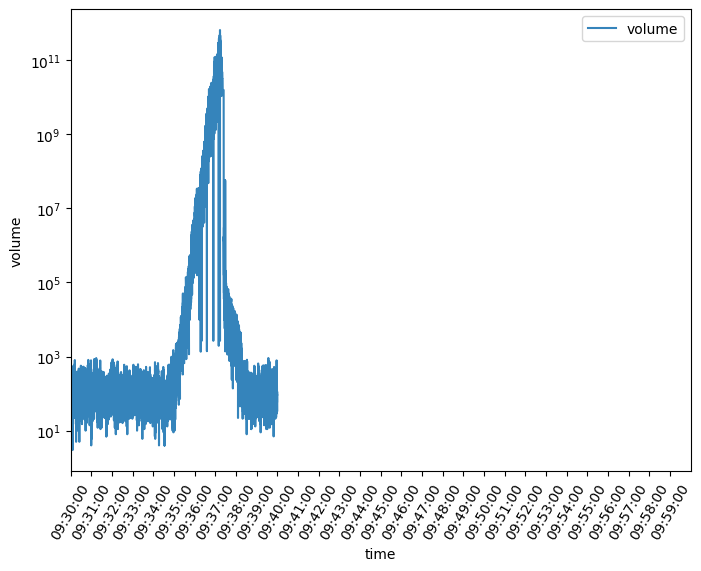

In [ ]:
best_bids = pd.DataFrame(L1["best_bids"],columns=["time","price","qty"])
best_asks = pd.DataFrame(L1["best_asks"],columns=["time","price","qty"])

## All times are in ns from 1970, remove the date component to put them in ns from midnight
best_bids["time"] = best_bids["time"].apply( lambda x: x - ns_date(x) )
best_asks["time"] = best_asks["time"].apply( lambda x: x - ns_date(x) )

start, end = str_to_ns("09:30:00"), str_to_ns("10:00:00")

best_bids = best_bids[(best_bids['time'] > start) & (best_bids['time'] < end)]
best_asks = best_asks[(best_asks['time'] > start) & (best_asks['time'] < end)]

y_max, y_min = best_asks.price.max(), best_bids.price.min()

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_yscale('log')
ax.plot(best_bids.time,best_bids.qty + best_asks.qty, alpha=0.9, label='volume')
# ax.plot(best_asks.time,best_asks.price, alpha=0.9, label='ask')
# ax.plot(dfFund.time, dfFund.FundamentalValue, alpha=0.6, label='fundamental value')
ax.set_ylabel("volume")
ax.set_xlabel("time")
# ax.set_ylim(0, 100)
ax.set_xlim(start, end)

time_mesh = np.arange(start, end, 1e9*60)
ax.set_xticks(time_mesh, [fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60)
plt.legend(loc='best')
plt.show()

# spread = best_asks.price - best_bids.price

# fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(best_bids.time, spread, alpha=0.9, label='spread')
# ax.set_ylabel("ticks")
# ax.set_xlabel("time")
# ax.set_ylim(0, 80)
# ax.set_xlim(start, end)

# ax.set_xticks(time_mesh, [fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60)
# plt.legend(loc='best')
# plt.show()


In [ ]:
L2["bids"][10000]

array([[10042.,    29.],
       [10041.,    20.],
       [10040.,    60.],
       [10039.,   161.],
       [10038.,    34.],
       [10037.,   240.],
       [10036.,    23.],
       [10033.,    20.],
       [10032.,    64.],
       [10031.,    40.]])

As an illustration we plot the time series of the fifth best bid price and fifth best ask price throughout the simulation

In [ ]:
## plotting LOB
# start, end = 20000, 30000
times = [t - ns_date(t) for t in L2["times"] ]
start, end = str_to_ns("09:30:00"), str_to_ns("09:40:00")
left = next(x for x, val in enumerate(times) if val > start)
right = next(x for x, val in enumerate(times) if val > end)
times = times[left:right]

fig, ax = plt.subplots(figsize=(12, 6))
y_min, y_max = min(L2["bids"][left:right, 4, 0]), max(L2["asks"][left:right, 4, 0])
for i in range(8):
    im_bid = ax.scatter(times, L2["bids"][left:right, i, 0], alpha=1, s=0.3, c=L2["bids"][left:right, i, 1], cmap="viridis")
    im_ask = ax.scatter(times, L2["asks"][left:right, i, 0], alpha=1, s=0.3, c=L2["asks"][left:right, i, 1], cmap="Reds")

ax.set_ylim(y_min, y_max)
ax.set_xlim(start, end)

time_mesh = np.arange(start, end, 1e9*60*2)
ax.set_xticks(time_mesh, [fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )
ax.set_ylabel("price(ticks)")
ax.set_xlabel("time")
fig.colorbar(im_bid, ax=ax, label='bid')
fig.colorbar(im_ask, ax=ax, label='ask')

# plt.legend(loc='best')
plt.show()

StopIteration: 

### Looking at agents logs

All agents can be inspected to retrieve desired information. 
The utility parse_logs_df for instance provides a quick way to retrieve and aggregate the log variables of each agent in a single dataframe

In [ ]:
logs_df = parse_logs_df( end_state )

#### Histogram of order submission times for noise agents

As an illustration we retrieve the submission times of all the orders sent by noise agent and display the histogram of all these times

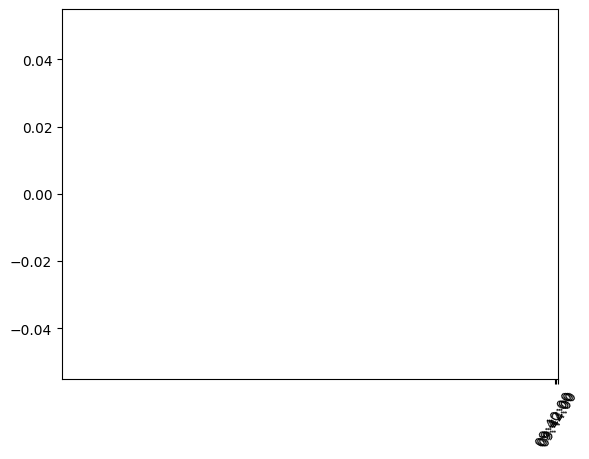

In [ ]:
plt.hist( logs_df[ (logs_df.agent_type == "AdaptivePOVMarketMakerAgent") & (logs_df.EventType=="ORDER_SUBMITTED") ].EventTime.apply(lambda x: x - ns_date(x) )  )

_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )




We proceed the same way for value agents as well

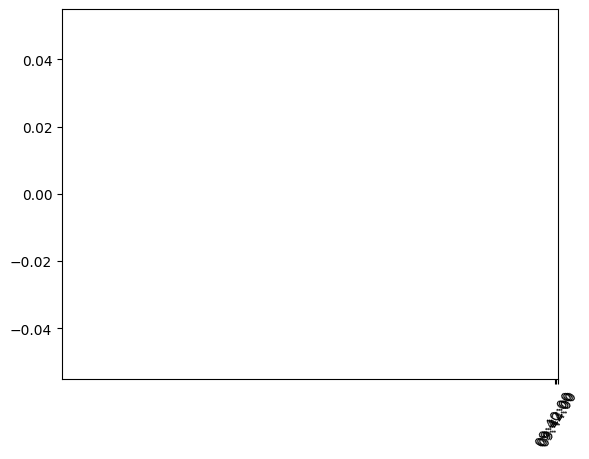

In [ ]:
plt.hist( logs_df[ (logs_df.agent_type == "ValueAgent") & (logs_df.EventType=="ORDER_SUBMITTED") ].EventTime.apply(lambda x: x - ns_date(x) )  )

_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )